Loan status prediction using Logistic Regression

Step 1: Importing necessart libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Step 2: Loading the dataset

In [2]:
df = pd.read_csv("loan-prediction.csv")

Step 3: Separate target and features

In [3]:
df.drop(columns=["Loan_ID"], inplace=True)

# Separate target and features
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]


Step 4: Handling the missing data

In [4]:
num_imputer = SimpleImputer(strategy="mean")
X[X.select_dtypes(include=["int64", "float64"]).columns] = num_imputer.fit_transform(
    X.select_dtypes(include=["int64", "float64"])
)

cat_imputer = SimpleImputer(strategy="most_frequent")
X[X.select_dtypes(include=["object"]).columns] = cat_imputer.fit_transform(
    X.select_dtypes(include=["object"])
)

Step 5: Encode the categorical features

In [5]:
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target
y = LabelEncoder().fit_transform(y)  # 'Y' -> 1, 'N' -> 0

Step 6: Splitting the dataset into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 7: Train the training dataset with logistic regression model

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Step 8: Predict the output

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Step 9: Creating confusion matrix

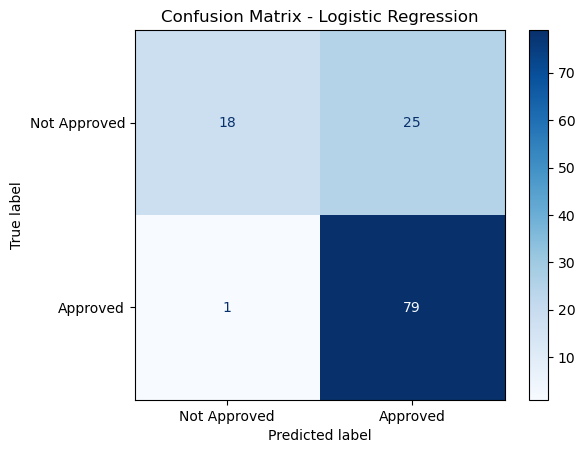

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Loan Prediction Model with User Input for Status Prediction

In [11]:
# ==== USER INPUT SECTION ====
def get_user_input():
    data = {}
    for col in X.columns:
        if col in label_encoders:  # it's categorical
            options = list(label_encoders[col].classes_)
            print(f"{col} options: {options}")
            val = input(f"Enter value for {col}: ")
            data[col] = label_encoders[col].transform([val])[0]
        else:
            val = float(input(f"Enter numeric value for {col}: "))
            data[col] = val
    return pd.DataFrame([data])

# Get input from user and predict
user_data = get_user_input()
prediction = model.predict(user_data)[0]

# Decode output
result = "Approved ✅" if prediction == 1 else "Not Approved ❌"
print(f"\nLoan Prediction Result: {result}")


Gender options: ['Female', 'Male']


Enter value for Gender:  Male


Married options: ['No', 'Yes']


Enter value for Married:  No


Dependents options: ['0', '1', '2', '3+']


Enter value for Dependents:  1


Education options: ['Graduate', 'Not Graduate']


Enter value for Education:  Not Graduate


Self_Employed options: ['No', 'Yes']


Enter value for Self_Employed:  Yes
Enter numeric value for ApplicantIncome:  2500
Enter numeric value for CoapplicantIncome:  0
Enter numeric value for LoanAmount:  200
Enter numeric value for Loan_Amount_Term:  360
Enter numeric value for Credit_History:  0


Property_Area options: ['Rural', 'Semi-urban', 'Semiurban', 'Urban', 'semiurban']


Enter value for Property_Area:  Rural



Loan Prediction Result: Not Approved ❌
